Different success indexes' calculation for classification algorithm/ Elad David  (206760274) & Inbar Shmaya (208774026)

---



The data "digits" has 10 classes, 10 digits and 64 characters.

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Bring the data from sklearn:

In [8]:
data, labels = load_digits(return_X_y = True) 
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size
print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

#n_samples, n_features = 
print(labels.shape)
print(data.shape)

# digits: 10; # samples: 1797; # features 64
(1797,)
(1797, 64)


Here we chose 2 classes and separated them by logic_regression:

In [ ]:
data, labels = load_digits(return_X_y = True, n_class = 2) 
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Separate the data into 2 groups: train and test 
header_x = data[0]
X_scaled_df = pd.DataFrame(normalized_data, columns = header_x)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, labels, test_size = 0.25, random_state = 0)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Printing the confusion matrix:

Accuracy:  1.0


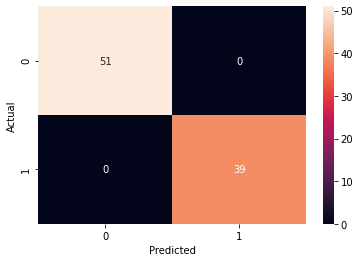

In [ ]:
y_pred = logistic_regression.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
# print(y_test)
# print(y_pred)
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plt.show()

For different thresholds, calculate the TPR and the FPR (Draw the graphs of the ROC (Receiver Operating Characteristic), random and model with different thresholds):

1.0
0.0


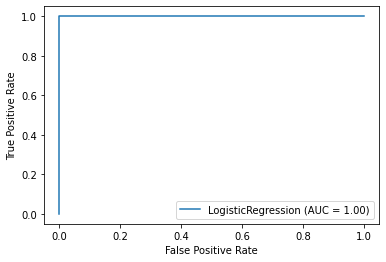

In [ ]:
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

TP = confusion_matrix[1][1] # TP
FN = confusion_matrix[1][0] # FN
FP = confusion_matrix[0][1] # FP
TN = confusion_matrix[0][0] # TN

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print(TPR)
print(FPR)

# Draw the graph for the current TPR & FPR points: ROC 
metrics.plot_roc_curve(logistic_regression, X_train, y_train)

# We tried to understand diffrenet threashols...
# Calculate additional 10 points for each threshold from the relevant array, and draw the graph they create ON THE SAME AXIS SYSTEM

# y_pred = logistic_regression.predict_proba(X_test)
# for thresh in range(len(thresholds)): 
 
#   # temp array of binary in y_pred length
#   binary_pred = [None] * len(y_pred)
  
#   for pred in range(len(y_pred)):
#     # print(y_pred[pred])
#     if y_pred[pred][0] > thresholds[thresh]:
#       binary_pred[pred] = 1
#     else:
#       binary_pred[pred] = 0
#   # confusion matrix for binary array
#   confusion_matrix = pd.crosstab(y_test, binary_pred, rownames=['Actual'], colnames=['Predicted'])


  # x=fpr y=tpr for cm for each tresh
  # save in array and then figure this array

# figure all the dots

Calculate the AUC (Area Under Curve):

In [ ]:
# Calculate an integral for the graph ROC model (the one with the curve) and print the result
metrics.roc_auc_score(y_test,y_pred)

1.0